# RGB to HSI

Import Libraries

In [13]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Download Gambar

In [14]:
url = "https://drive.google.com/uc?id=1jwrW5d4AmUutLl0hUscOePqimXO8IBFS"
output = "cat.jpg"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jwrW5d4AmUutLl0hUscOePqimXO8IBFS
To: /content/cat.jpg
100%|██████████| 143k/143k [00:00<00:00, 8.34MB/s]


'cat.jpg'

Gambar Awal RGB

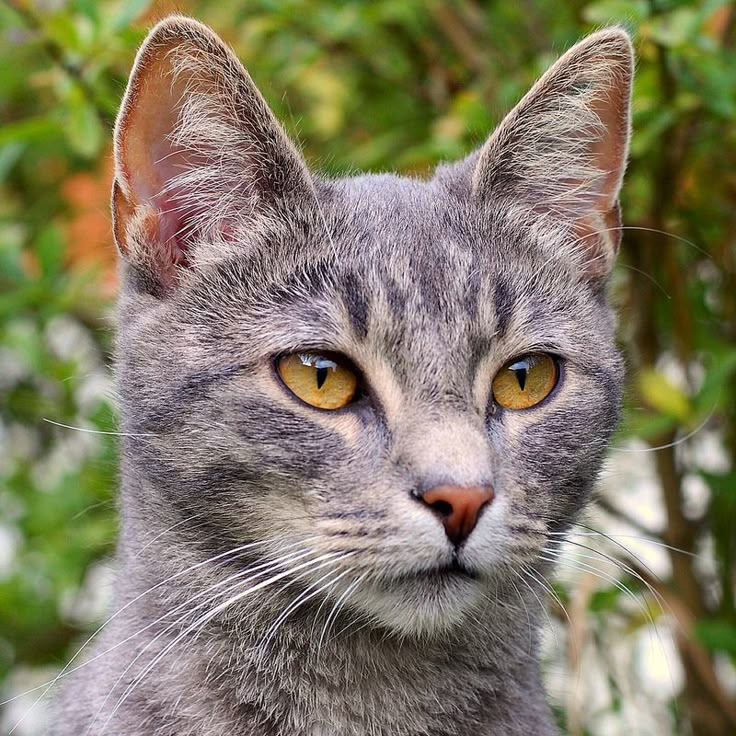

In [15]:
image_rgb = Image.open(output)
image_rgb = image_rgb.convert('RGB')
image_rgb

Convert Gambar RGB to HSI

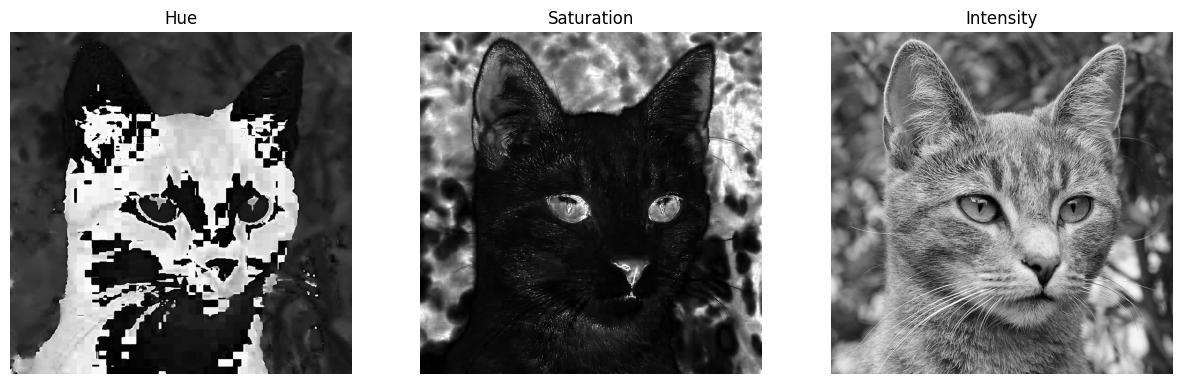

In [16]:
image_np = np.array(image_rgb) / 255.0
R, G, B = image_np[:, :, 0], image_np[:, :, 1], image_np[:, :, 2]
epsilon = 1e-10

I = ((R + G + B) / 3) * 255
min_rgb = np.minimum(np.minimum(R, G), B)
S = np.where((R + G + B) > epsilon, (1 - 3 * min_rgb / (R + G + B + epsilon)) * 255, 0)
num = 0.5 * ((R - G) + (R - B))
denom = np.sqrt((R - G) ** 2 + (R - B) * (G - B)) + 1e-10
H_radians = np.arccos(np.clip(num / denom, -1.0, 1.0))
H = np.where(B > G, 2 * np.pi - H_radians, H_radians) * (255 / (2 * np.pi))

plt.figure(figsize=(15, 5))
for i, (channel, title) in enumerate(zip([H, S, I], ['Hue', 'Saturation', 'Intensity'])):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel.astype(np.uint8), cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()